In [1]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt


In [2]:
# 独立样本 t 检验
# 情境： 某教师想比较两组学生使用不同教学方法后的考试成绩是否有显著差异。
group1 = [70, 75, 80, 85, 90]
group2 = [78, 83, 88, 92, 95]

In [3]:
# 平均数
group1_average = (70 + 75 + 80 + 85 + 90) / 5

# 方差
squared_sum = ((70 - group1_average) ** 2 +
               (75 - group1_average) ** 2 +
               (80 - group1_average) ** 2 +
               (85 - group1_average) ** 2 +
               (90 - group1_average) ** 2)
group1_variance = squared_sum / (len(group1) - 1)

# 标准差
group1_std_deviation = group1_variance ** 0.5

print(group1_average)
print(group1_variance)
print(group1_std_deviation)

80.0
62.5
7.905694150420948


In [4]:
std_group1 = np.std(group1, ddof=1)
print(std_group1)

7.905694150420948


In [5]:
# 数据
group1 = [70, 75, 80, 85, 90]
group2 = [78, 83, 88, 92, 95]

# 计算平均数
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)

# 计算标准差
std_group1 = np.std(group1, ddof=1)  # ddof=1 是样本标准差
std_group2 = np.std(group2, ddof=1)

# 计算 t 检验和 p 值
t_stat, p_value = ttest_ind(group1, group2)

# 计算 合并方差
pooled_std = np.sqrt(((len(group1) - 1) * std_group1**2 + (len(group2) - 1) * std_group2**2) /
                     (len(group1) + len(group2) - 2))

# 计算 ES
cohen_d = (mean_group2 - mean_group1) / pooled_std

# 打印结果
print("平均数 (Group 1):", mean_group1)
print("平均数 (Group 2):", mean_group2)
print("标准差 (Group 1):", std_group1)
print("标准差 (Group 2):", std_group2)
print("t统计量:", t_stat)
print("p值:", p_value)
print("效果量 (Cohen's d):", cohen_d)

平均数 (Group 1): 80.0
平均数 (Group 2): 87.2
标准差 (Group 1): 7.905694150420948
标准差 (Group 2): 6.833739825307955
t统计量: -1.540657773039287
p值: 0.16196729498279083
效果量 (Cohen's d): 0.9743975315293807


In [6]:
# 数据
pre_training = [68, 72, 75, 80, 85]
post_training = [70, 74, 78, 85, 90]

# 计算差值
differences = np.array(post_training) - np.array(pre_training)

# 计算差值均值和标准差
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# 计算 t 检验和 p 值
t_stat, p_value = ttest_rel(pre_training, post_training)

# 计算效应量 (Cohen's d)
cohen_d = mean_diff / std_diff

# 输出结果
print("差值均值:", mean_diff)
print("差值标准差:", std_diff)
print("t统计量:", t_stat)
print("p值:", p_value)
print("效果量 (Cohen's d):", cohen_d)

差值均值: 3.4
差值标准差: 1.51657508881031
t统计量: -5.013026509266503
p值: 0.007421788771994215
效果量 (Cohen's d): 2.241893609545676


In [2]:


def calculate_statistics(group1, group2):
    # 计算平均数
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)

    # 计算标准差
    std_group1 = np.std(group1, ddof=1)  # ddof=1 是样本标准差
    std_group2 = np.std(group2, ddof=1)

    # 计算 t 检验和 p 值
    t_stat, p_value = ttest_ind(group1, group2)

    # 计算合并方差
    pooled_std = np.sqrt(((len(group1) - 1) * std_group1**2 + (len(group2) - 1) * std_group2**2) /
                         (len(group1) + len(group2) - 2))

    # 计算效果量 (Cohen's d)
    cohen_d = (mean_group2 - mean_group1) / pooled_std

    return {
        "mean_group1": mean_group1,
        "mean_group2": mean_group2,
        "std_group1": std_group1,
        "std_group2": std_group2,
        "t_stat": t_stat,
        "p_value": p_value,
        "cohen_d": cohen_d
    }

In [3]:
group1 = [
1 / 3, 1 / 3, 1 / 4, 1 / 3, 1 / 4, 5 / 12,
    1 / 4, 1 / 4, 1 / 3, 1 / 4, 1 / 4, 1 / 4,
    1 / 4, 5 / 12, 1 / 4, 1 / 3, 1 / 6, 1 / 4,
    1 / 3, 1 / 4, 1 / 6, 1 / 6, 1 / 4, 1 / 4]

group2 = [
3 / 4, 3 / 4, 2 / 3, 1 / 2, 3 / 4, 3 / 4,
    5 / 6, 3 / 4, 3 / 4, 2 / 3, 3 / 4, 2 / 3,
    5 / 6, 7 / 12, 5 / 6, 7 / 12, 3 / 4, 5 / 6,
    5 / 6, 2 / 3, 3 / 4, 2 / 3, 3 / 4, 3 / 4]


# 调用方法
results = calculate_statistics(group1, group2)

# 打印结果
print("平均数 (Group 1):", results["mean_group1"])
print("平均数 (Group 2):", results["mean_group2"])
print("标准差 (Group 1):", results["std_group1"])
print("标准差 (Group 2):", results["std_group2"])
print("t统计量:", results["t_stat"])
print("p值:", results["p_value"])
print("效果量 (Cohen's d):", results["cohen_d"])


平均数 (Group 1): 0.2743055555555555
平均数 (Group 2): 0.7256944444444443
标准差 (Group 1): 0.06720420367766045
标准差 (Group 2): 0.08680857482671892
t统计量: -20.143016838315027
p值: 1.8684000681911075e-24
效果量 (Cohen's d): 5.814788096946173


In [7]:
group1 = [
1 / 3, 1 / 3, 1 / 4, 1 / 3, 1 / 4, 5 / 12,
    1 / 4, 1 / 4, 1 / 3, 1 / 4, 1 / 4, 1 / 4,
    1 / 4, 5 / 12, 1 / 4, 1 / 3, 1 / 6, 1 / 4,
    1 / 3, 1 / 4, 1 / 4, 1 / 6, 1/2, 1 / 4]

group2 = [
3 / 4, 3 / 4, 2 / 3, 1 / 2, 3 / 4, 3 / 4,
    5 / 6, 3 / 4, 3 / 4, 2 / 3, 3 / 4, 2 / 3,
    5 / 6, 7 / 12, 5 / 6, 7 / 12, 3 / 4, 5 / 6,
    5 / 6, 2 / 3, 3 / 4, 2 / 3, 3 / 4, 3 / 4]


# 调用方法
results = calculate_statistics(group1, group2)

# 打印结果
print("平均数 (Group 1):", results["mean_group1"])
print("平均数 (Group 2):", results["mean_group2"])
print("标准差 (Group 1):", results["std_group1"])
print("标准差 (Group 2):", results["std_group2"])
print("t统计量:", results["t_stat"])
print("p值:", results["p_value"])
print("效果量 (Cohen's d):", results["cohen_d"])

平均数 (Group 1): 0.2881944444444444
平均数 (Group 2): 0.7256944444444443
标准差 (Group 1): 0.07762774521842859
标准差 (Group 2): 0.08680857482671892
t统计量: -18.40454489323962
p值: 7.577808487179242e-23
效果量 (Cohen's d): 5.312934474212222


In [15]:
# 示例数据
group1 = [
1/4, 1/3, 1/3, 1/3, 1/6, 7/12,
 1/12, 1/3, 1/3, 1/6, 1/4, 1/4,
 1/4, 5/12, 1/4, 1/3, 1/6, 1/4,
 1/3, 1/4, 1/6, 1/6, 1/4, 5/12]


# [0.25, 0.3333, 0.3333, 0.3333, 0.1667, 0.5833,
#  0.0833, 0.3333, 0.3333, 0.1667, 0.25, 0.25,
#  0.25, 0.4167, 0.25, 0.3333, 0.1667, 0.25,
#  0.3333, 0.25, 0.1667, 0.1667, 0.25, 0.4167]


group2 = [
1, 5/6, 2/3, 1/2, 3/4, 5/6,
 1, 3/4, 1, 1/2, 7/12, 2/3,
 11/12, 7/12, 11/12, 1/2, 5/6, 5/6,
 1, 5/12, 11/12, 2/3, 5/6, 5/6]

# [1.0, 0.8333, 0.6667, 0.5, 0.75, 0.8333,
#  1.0, 0.75, 1.0, 0.5, 0.5833, 0.6667,
#  0.9167, 0.5833, 0.9167, 0.5, 0.8333, 0.8333,
#  1.0, 0.4167, 0.9167, 0.6667, 0.8333, 0.8333]

# 调用方法
results = calculate_statistics(group1, group2)

# 打印结果
print("平均数 (Group 1):", results["mean_group1"])
print("平均数 (Group 2):", results["mean_group2"])
print("标准差 (Group 1):", results["std_group1"])
print("标准差 (Group 2):", results["std_group2"])
print("t统计量:", results["t_stat"])
print("p值:", results["p_value"])
print("效果量 (Cohen's d):", results["cohen_d"])



平均数 (Group 1): 0.27777777777777773
平均数 (Group 2): 0.7638888888888888
标准差 (Group 1): 0.10617034287843435
标准差 (Group 2): 0.1800205749557739
t统计量: -11.394679007212943
p值: 5.453836242678704e-15
效果量 (Cohen's d): 3.2893604960718847


In [16]:
# 示例数据
group1 = [
0, 1/3, 1/3, 2/3, 1/3, 1/3,
 0, 2/3, 1/3, 1/3, 1/3, 0,
 0, 2/3, 1/3, 1/3, 0, 0,
 0, 1/3, 1/3, 0, 1/3, 1/3]


# [0.0, 0.3333, 0.3333, 0.6667, 0.3333, 0.3333,
#  0.0, 0.6667, 0.3333, 0.3333, 0.3333, 0.0,
#  0.0, 0.6667, 0.3333, 0.3333, 0.0, 0.0,
#  0.0, 0.3333, 0.3333, 0.0, 0.3333, 0.3333]


group2 = [
1, 2/3, 2/3, 2/3, 1/3, 2/3, 0,
 1, 1, 1, 1, 2/3, 1/3,
 1, 1, 2/3, 1, 1, 2/3,
 1, 1/3, 2/3, 1, 1, 1/3]

# [1.0, 0.6667, 0.6667, 0.6667, 0.3333, 0.6667, 0.0,
#  1.0, 1.0, 1.0, 1.0, 0.6667, 0.3333,
#  1.0, 1.0, 0.6667, 1.0, 1.0, 0.6667,
#  1.0, 0.3333, 0.6667, 1.0, 1.0, 0.3333]

# 调用方法
results = calculate_statistics(group1, group2)

# 打印结果
print("平均数 (Group 1):", results["mean_group1"])
print("平均数 (Group 2):", results["mean_group2"])
print("标准差 (Group 1):", results["std_group1"])
print("标准差 (Group 2):", results["std_group2"])
print("t统计量:", results["t_stat"])
print("p值:", results["p_value"])
print("效果量 (Cohen's d):", results["cohen_d"])



平均数 (Group 1): 0.2638888888888889
平均数 (Group 2): 0.7466666666666666
标准差 (Group 1): 0.21933511004669282
标准差 (Group 2): 0.293131243517176
t统计量: -6.506283301792213
p值: 4.5926092267417036e-08
效果量 (Cohen's d): 1.8593253246611743


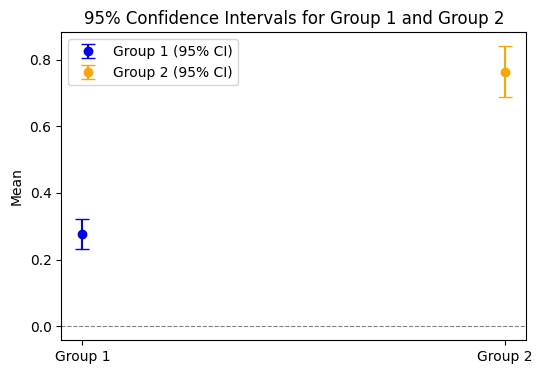

In [8]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# 数据
group1 = [
    1/4, 1/3, 1/3, 1/3, 1/6, 7/12,
    1/12, 1/3, 1/3, 1/6, 1/4, 1/4,
    1/4, 5/12, 1/4, 1/3, 1/6, 1/4,
    1/3, 1/4, 1/6, 1/6, 1/4, 5/12
]

group2 = [
    1, 5/6, 2/3, 1/2, 3/4, 5/6,
    1, 3/4, 1, 1/2, 7/12, 2/3,
    11/12, 7/12, 11/12, 1/2, 5/6, 5/6,
    1, 5/12, 11/12, 2/3, 5/6, 5/6
]

# 将组数据转换为 numpy 数组
group1 = np.array(group1)
group2 = np.array(group2)

# 计算 group1 的均值、标准差和置信区间
mean1 = np.mean(group1)
std1 = np.std(group1, ddof=1)
n1 = len(group1)
t_critical1 = t.ppf(0.975, df=n1 - 1)  # 95% 置信水平
margin1 = t_critical1 * (std1 / np.sqrt(n1))
ci_lower1 = mean1 - margin1
ci_upper1 = mean1 + margin1

# 计算 group2 的均值、标准差和置信区间
mean2 = np.mean(group2)
std2 = np.std(group2, ddof=1)
n2 = len(group2)
t_critical2 = t.ppf(0.975, df=n2 - 1)  # 95% 置信水平
margin2 = t_critical2 * (std2 / np.sqrt(n2))
ci_lower2 = mean2 - margin2
ci_upper2 = mean2 + margin2

# 绘制图形
plt.figure(figsize=(6, 4))
plt.errorbar(1, mean1, yerr=margin1, fmt='o', capsize=5, label='Group 1 (95% CI)', color='blue')
plt.errorbar(2, mean2, yerr=margin2, fmt='o', capsize=5, label='Group 2 (95% CI)', color='orange')
plt.axhline(0, linestyle='--', color='gray', linewidth=0.8)  # 参考线
plt.xticks([1, 2], ['Group 1', 'Group 2'])
plt.ylabel('Mean')
plt.title('95% Confidence Intervals for Group 1 and Group 2')
plt.legend()
plt.show()


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_group_means_with_error_bars(group1, group2):
    # 计算平均数和标准差
    mean_group1 = np.mean(group1)
    std_group1 = np.std(group1, ddof=1)

    mean_group2 = np.mean(group2)
    std_group2 = np.std(group2, ddof=1)

    # 绘制柱状图
    labels = ['Group 1', 'Group 2']
    means = [mean_group1, mean_group2]
    errors = [std_group1, std_group2]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, means, color=['blue', 'orange'], width=0.4)

    # 添加竖线和端点横线 (均值 ± 标准差)
    for i, (bar, error) in enumerate(zip(bars, errors)):
        x = bar.get_x() + bar.get_width() / 2  # 柱子的中心
        lower = means[i] - error
        upper = means[i] + error
        plt.vlines(x, lower, upper, colors='black', linewidth=1.5)
        plt.hlines(lower, x - 0.05, x + 0.05, colors='black', linewidth=1.5)  # 下端短横线
        plt.hlines(upper, x - 0.05, x + 0.05, colors='black', linewidth=1.5)  # 上端短横线

    # 设置图表属性
    plt.ylabel('Mean')
    plt.title('Mean and Standard Deviation for Groups')
    plt.ylim(0, 1)  # 限制 y 轴范围为 [0, 1]
    plt.show()

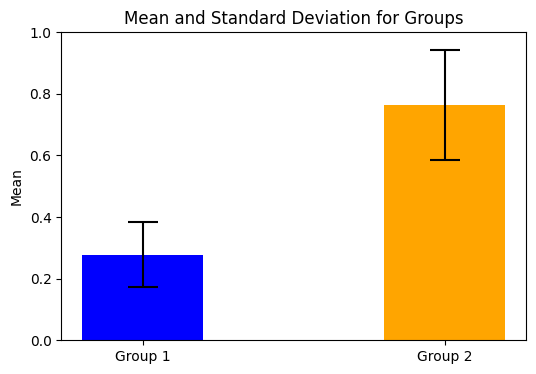

In [14]:
# 示例调用
group1 = [
    1/4, 1/3, 1/3, 1/3, 1/6, 7/12,
    1/12, 1/3, 1/3, 1/6, 1/4, 1/4,
    1/4, 5/12, 1/4, 1/3, 1/6, 1/4,
    1/3, 1/4, 1/6, 1/6, 1/4, 5/12
]

group2 = [
    1, 5/6, 2/3, 1/2, 3/4, 5/6,
    1, 3/4, 1, 1/2, 7/12, 2/3,
    11/12, 7/12, 11/12, 1/2, 5/6, 5/6,
    1, 5/12, 11/12, 2/3, 5/6, 5/6
]

plot_group_means_with_error_bars(group1, group2)
